In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import cv2 as cv
import os
from tensorflow import keras
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from keras.models import Sequential
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical

In [2]:
train_dir = r'C:/Users/viswa/Downloads/animal_split_dataset/train'
test_dir = r'C:/Users/viswa/Downloads/animal_split_dataset/test'

labels = ['Cow', 'Goat', 'Peacock', 'Wild Boar']

label_len = len(labels)
print(label_len)

4


In [3]:
X = []
Y = []


for label in labels:
    folderpath = os.path.join(train_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X.append(np.array(img))
            Y.append(labels.index(label))

X = np.array(X)
Y = np.array(Y)

In [4]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (356, 224, 224, 3)
Y shape: (356,)


In [5]:
X_valid = []
Y_valid = []
X_valid_path = []

for label in labels:
    folderpath = os.path.join(test_dir, label)
    
    for file in os.listdir(folderpath):
        img_path = os.path.join(folderpath, file)
        img = cv.imread(img_path)
        
        if img is not None:
            img = cv.resize(img, (224, 224))
            X_valid.append(np.array(img))
            X_valid_path.append(img_path)
            Y_valid.append(labels.index(label))
            
X_valid = np.array(X_valid)
Y_valid = np.array(Y_valid)

In [6]:
total_images = X.shape[0] + X_valid.shape[0]
print(total_images)

400


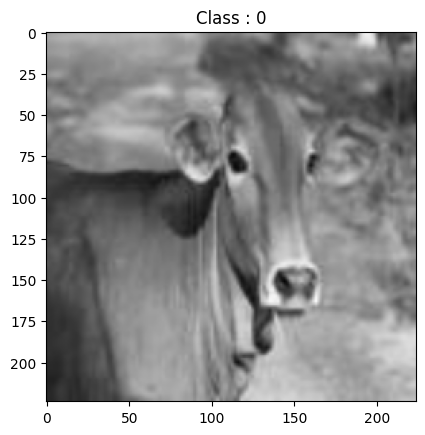

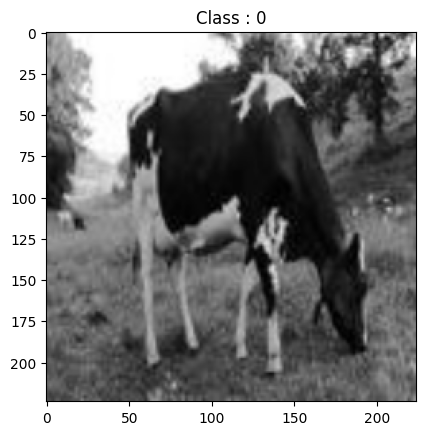

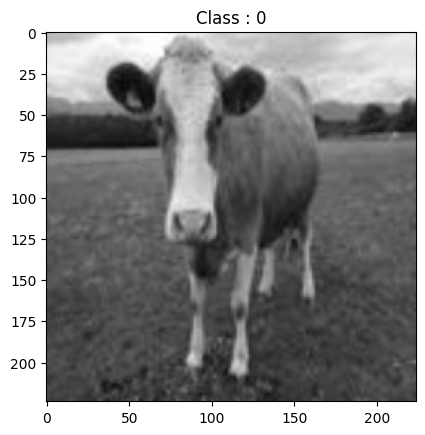

In [8]:
for i in range(3):
    plt.imshow(X[i])
    plt.title(f"Class : {Y[i]}")
    plt.show()

In [11]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(len(labels), activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
Y_one_hot = to_categorical(Y)
Y_valid_one_hot = to_categorical(Y_valid)
history = model.fit(X, Y_one_hot, epochs=3, validation_data=(X_valid, Y_valid_one_hot))
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1) 
acc_score = accuracy_score(Y_valid, Y_pred_classes)
print( acc_score)
model.save('animal.h5')

Epoch 1/3
12/12 [==============================] - 92s 7s/step - loss: 1.9102 - accuracy: 0.5056 - val_loss: 0.4559 - val_accuracy: 0.8409
Epoch 2/3
12/12 [==============================] - 79s 7s/step - loss: 0.2696 - accuracy: 0.9017 - val_loss: 0.2791 - val_accuracy: 0.9091
Epoch 3/3
2/2 [==============================] - 26s 2s/step
0.8409090909090909


C:\Users\viswa\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [12]:
model = keras.models.load_model('animal.h5')

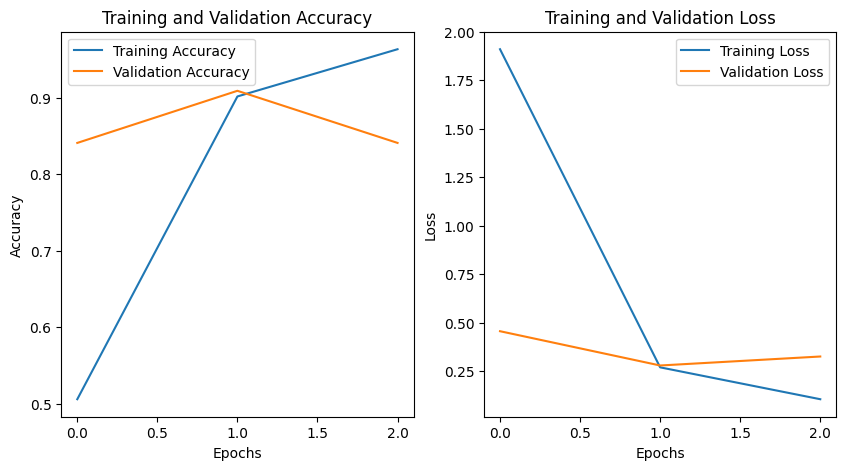

In [33]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')

    plt.show()

plot_training_history(history)


In [13]:
loss, accuracy = model.evaluate(X_valid, Y_valid_one_hot)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

2/2 [==============================] - 10s 2s/step - loss: 0.3254 - accuracy: 0.8409
Validation Loss: 0.3254227340221405
Validation Accuracy: 0.8409090638160706


In [14]:
Y_pred = model.predict(X_valid)
Y_pred_classes = np.argmax(Y_pred, axis=1)

2/2 [==============================] - 11s 3s/step


In [15]:
print("Accuracy Score:", accuracy_score(Y_valid, Y_pred_classes))
print("\nClassification Report:\n", classification_report(Y_valid, Y_pred_classes, target_names=labels))

Accuracy Score: 0.8409090909090909

Classification Report:
               precision    recall  f1-score   support

         Cow       0.83      0.91      0.87        11
        Goat       0.73      0.73      0.73        11
     Peacock       0.85      1.00      0.92        11
   Wild Boar       1.00      0.73      0.84        11

    accuracy                           0.84        44
   macro avg       0.85      0.84      0.84        44
weighted avg       0.85      0.84      0.84        44



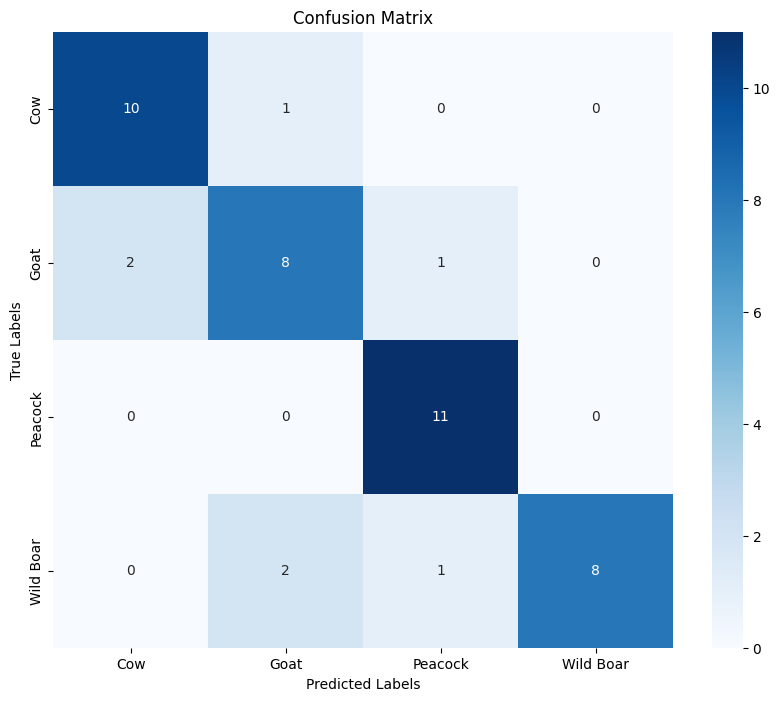

In [16]:
conf_matrix = confusion_matrix(Y_valid, Y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

1/1 [==============================] - 2s 2s/step


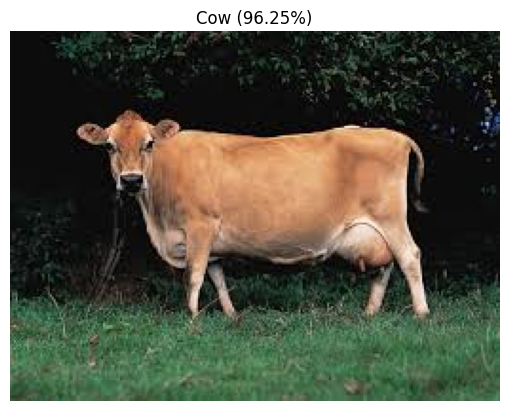

Cow (96.25%)


In [36]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input

model = load_model('animal.h5')

labels = ['Cow', 'Goat', 'Peacock', 'Wild Boar']
confidence_threshold = 90.0  

def prepare_image(img_path):
    img = cv.imread(img_path)
    if img is not None:
        img = cv.resize(img, (224, 224))  
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  
        img = np.expand_dims(img, axis=0)  
        img = preprocess_input(img)  
        return img
    else:
        print("Image not found or unable to load.")
        return None

def predict_image(img_path):
    img = prepare_image(img_path)
    if img is not None:
        prediction = model.predict(img)
        predicted_class = np.argmax(prediction, axis=1)[0]
        confidence = np.max(prediction) * 100

        if confidence >= confidence_threshold:
            label = f"{labels[predicted_class]} ({confidence:.2f}%)"
        else:
            label = "No animal detected"

        plt.imshow(cv.cvtColor(cv.imread(img_path), cv.COLOR_BGR2RGB))
        plt.title(label)
        plt.axis('off')
        plt.show()

        print(label)
    else:
        print("Prediction skipped due to image loading error.")

img_path = "C:/Users/viswa/Downloads/cow.jpeg"
predict_image(img_path)
